<IPython.core.display.Javascript object>


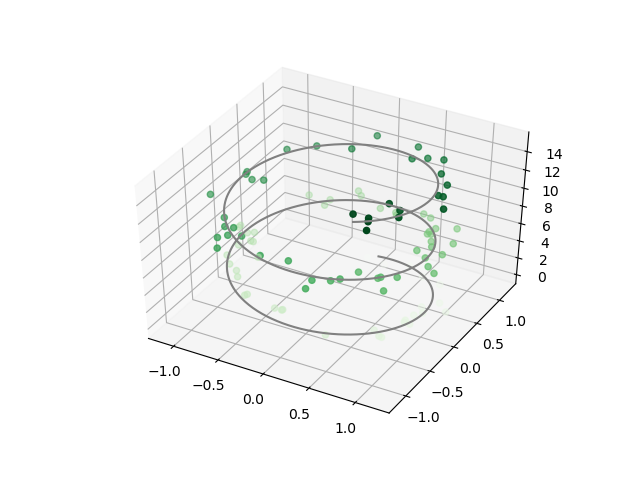

In [8]:
from mpl_toolkits import mplot3d
import  numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
#fig = plt.figure()
ax = plt.axes(projection="3d")
#ax = plot_utils.init_3d_figure()
#my_chain.plot(my_chain.inverse_kinematics(target_frame), ax, target=target_vector)
#plt.xlim(-0.1, 0.1)
#plt.ylim(-0.1, 0.1)


# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');